# <u> Exploratory Data Analysis </u>

# Data Cleaning

In [27]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#reading the dataset and viewing the first 5 items in the dataset
sales=pd.read_csv('sales_data_sample.csv', encoding= 'latin')
sales.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [6]:
#the bottom 5 items in the dataset
sales.tail()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small
2822,10414,47,65.52,9,3079.44,5/6/2005 0:00,On Hold,2,5,2005,...,8616 Spinnaker Dr.,NaN,Boston,MA,51003,USA,NaN,Yoshido,Juri,Medium


In [7]:
#rows and columns
sales.shape

(2823, 25)

In [1]:
#outlining the unique values in all the columns
unique_columns= sales.columns
for i, col_val in enumerate(unique_columns):
    print(unique_columns[i], (sales[col_val].unique())
    print('-----------------------------------------------------------------------------------------------')

SyntaxError: invalid syntax (<ipython-input-1-73768654bf1f>, line 5)

In [9]:
#checking for the dataset datatypes
sales.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [10]:
#converting the column into date time data type
sales['ORDERDATE']=pd.to_datetime(sales['ORDERDATE'], infer_datetime_format=True)
sales['ORDERDATE'].dtype

dtype('<M8[ns]')

In [11]:
#setting the date as the index for time series analysis later
sales.set_index('ORDERDATE', inplace=True)

In [12]:
#checking if there is any nul values in the dataset
sales.isnull().any()

ORDERNUMBER         False
QUANTITYORDERED     False
PRICEEACH           False
ORDERLINENUMBER     False
SALES               False
STATUS              False
QTR_ID              False
MONTH_ID            False
YEAR_ID             False
PRODUCTLINE         False
MSRP                False
PRODUCTCODE         False
CUSTOMERNAME        False
PHONE               False
ADDRESSLINE1        False
ADDRESSLINE2         True
CITY                False
STATE                True
POSTALCODE           True
COUNTRY             False
TERRITORY            True
CONTACTLASTNAME     False
CONTACTFIRSTNAME    False
DEALSIZE            False
dtype: bool

In [13]:
#checking the number of null values in each columns
sales.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [14]:
#dropping the column since it has so many null values
sales.drop(['ADDRESSLINE2','STATE'], axis=1, inplace=True)


In [15]:
#dropping the rows where postal code has null values
sales.dropna( axis=0, how='any', inplace= True)

In [16]:
#rechecking to see if there are any null values
sales.isnull().sum()

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
CITY                0
POSTALCODE          0
COUNTRY             0
TERRITORY           0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64

Data has no null values

In [17]:
#stripping all the spaces in our column names
sales.columns.str.strip()

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY',
       'POSTALCODE', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME',
       'CONTACTFIRSTNAME', 'DEALSIZE'],
      dtype='object')

In [18]:
#checking for duplicates
duplicated=sales.drop_duplicates(keep='first')
duplicated

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,...,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
ORDERDATE,,,,,,,,,,,,,,,,,,,,,
2003-05-07,10121,34,81.35,5,2765.90,Shipped,2,5,2003,Motorcycles,...,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,EMEA,Henriot,Paul,Small
2003-07-01,10134,41,94.74,2,3884.34,Shipped,3,7,2003,Motorcycles,...,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,EMEA,Da Cunha,Daniel,Medium
2003-11-11,10180,29,86.13,9,2497.77,Shipped,4,11,2003,Motorcycles,...,Daedalus Designs Imports,20.16.1555,"184, chausse de Tournai",Lille,59000,France,EMEA,Rance,Martine,Small
2003-11-18,10188,48,100.00,1,5512.32,Shipped,4,11,2003,Motorcycles,...,Herkku Gifts,+47 2267 3215,"Drammen 121, PR 744 Sentrum",Bergen,N 5804,Norway,EMEA,Oeztan,Veysel,Medium
2004-01-15,10211,41,100.00,14,4708.44,Shipped,1,1,2004,Motorcycles,...,Auto Canal Petit,(1) 47.55.6555,"25, rue Lauriston",Paris,75016,France,EMEA,Perrier,Dominique,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004-11-10,10327,37,86.74,4,3209.38,Resolved,4,11,2004,Ships,...,Danish Wholesale Imports,31 12 3555,Vinb'ltet 34,Kobenhavn,1734,Denmark,EMEA,Petersen,Jytte,Medium
2004-12-02,10350,20,100.00,15,2244.40,Shipped,4,12,2004,Ships,...,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,EMEA,Freyre,Diego,Small
2005-01-31,10373,29,100.00,1,3978.51,Shipped,1,1,2005,Ships,...,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,Oulu,90110,Finland,EMEA,Koskitalo,Pirkko,Medium


no duplicates found

In [19]:
#getting numerical values to for ploting the boxplot
numerical_data=sales._get_numeric_data().columns
numerical_data

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'MSRP'],
      dtype='object')

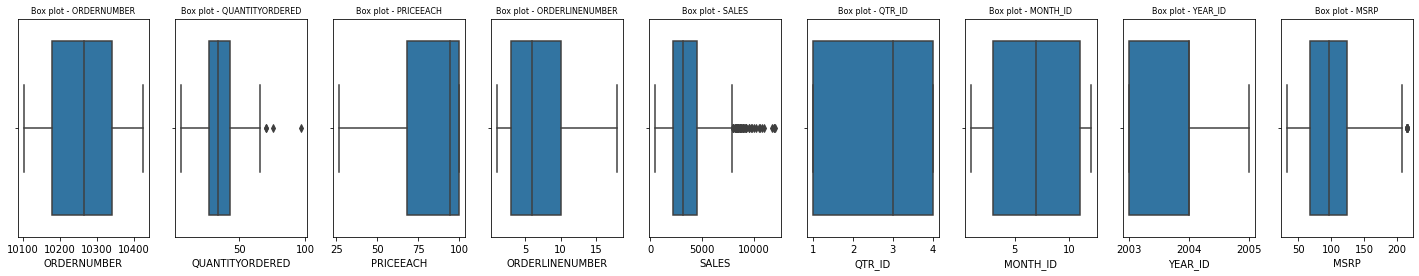

In [20]:
#checking for outliers

fig, ax = plt.subplots(ncols=len(numerical_data), figsize=(25,4))

for i, col_val in enumerate(numerical_data):

    sns.boxplot(sales[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=8)
   



plt.show()

There seem to have outliers in QuantityOrdered, Sales and MSRP

In [21]:
#finding the IQR
Q1 = sales.quantile(0.25)
Q3 = sales.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ORDERNUMBER         164.00
QUANTITYORDERED      16.00
PRICEEACH            31.76
ORDERLINENUMBER       7.00
SALES              2301.09
QTR_ID                3.00
MONTH_ID              8.00
YEAR_ID               1.00
MSRP                 56.00
dtype: float64


In [22]:
#excluding the outliers
sales_df = sales[~((sales < (Q1 - 1.5 * IQR)) |(sales > (Q3 + 1.5 * IQR))).any(axis=1)]
sales_df.shape

(1688, 22)

In [23]:
#cleaned dataset
sales_df.to_csv('ecommerce.csv')

In [25]:
sales_df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY',
       'POSTALCODE', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME',
       'CONTACTFIRSTNAME', 'DEALSIZE'],
      dtype='object')